In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = "^RUI", start="2012-03-11")
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12 00:00:00-04:00,759.429993,760.619995,756.840027,759.130005,759.130005,0
2012-03-13 00:00:00-04:00,761.450012,773.030029,761.450012,772.979980,772.979980,0
2012-03-14 00:00:00-04:00,773.190002,774.679993,769.280029,771.630005,771.630005,0
2012-03-15 00:00:00-04:00,772.380005,776.469971,770.739990,776.419983,776.419983,0
2012-03-16 00:00:00-04:00,776.559998,778.099976,775.640015,777.130005,777.130005,0
2012-03-19 00:00:00-04:00,777.119995,782.549988,776.070007,780.090027,780.090027,0
2012-03-20 00:00:00-04:00,778.030029,778.299988,773.119995,777.369995,777.369995,0
2012-03-21 00:00:00-04:00,777.559998,778.650024,774.760010,776.150024,776.150024,0
2012-03-22 00:00:00-04:00,773.640015,773.640015,768.000000,770.270020,770.270020,0


In [3]:
#ading indicators
data["RSI"]=ta.rsi(data.Close, lenght=15)
data["EMAF"]=ta.ema(data.Close, lenght=20)
data["EMAM"]=ta.ema(data.Close, lenght=100)
data["EMAS"]=ta.ema(data.Close, lenght=150)

data["Target"] = data ["Adj Close"]-data.Open
data["Target"] = data["Target"].shift(-1)

data["Target_Class"] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
data["Target_Next_Close"] = data["Adj Close"].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(["Volume", "Close", "Date"], axis=1, inplace=True)

In [4]:
data_set=data.iloc[:, 0:11]
pd.set_option("display.max_columns", None)

data_set.head(5)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,Target_Class,Target_Next_Close
0,777.419983,780.429993,775.049988,778.919983,62.815527,776.920039,776.920039,776.920039,4.880005,1,783.150024
1,778.270020,786.679993,776.669983,783.150024,67.135117,778.052764,778.052764,778.052764,-2.530029,0,781.989990
2,784.520020,784.840027,777.140015,781.989990,64.908263,778.768623,778.768623,778.768623,-5.960022,0,773.719971
3,779.679993,779.679993,771.059998,773.719971,51.733706,777.850686,777.850686,777.850686,-0.339966,0,773.130005
4,773.469971,775.210022,770.559998,773.130005,50.939388,776.992381,776.992381,776.992381,-5.649963,0,764.270020


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
#because we use neural networks our data must be scaled 0-1
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.03751187 0.03672186 0.0389696  ... 0.63967731 1.         0.03981122]
 [0.03794623 0.03990466 0.03979841 ... 0.61311805 0.         0.03921799]
 [0.04113993 0.03896766 0.04003889 ... 0.60082417 0.         0.03498884]
 ...
 [0.78514345 0.78026971 0.76834644 ... 0.61014374 0.         0.76427785]
 [0.7660681  0.76660145 0.76425353 ... 0.62913945 1.         0.76988772]
 [0.7689655  0.76955001 0.76117873 ... 0.58730215 0.         0.75462799]]


In [20]:
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data+set.values
backcandles = 10
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])
#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np .array(yi)
# Choose -1 for last column , classification else -2
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(X.shape)
print(X)
print(y.shape)
print(y)

2742
(2732, 10, 8)
[[[0.03751187 0.03672186 0.0389696  ... 0.02968217 0.02968217 0.02968217]
  [0.03794623 0.03990466 0.03979841 ... 0.0302721  0.0302721  0.0302721 ]
  [0.04113993 0.03896766 0.04003889 ... 0.03064493 0.03064493 0.03064493]
  ...
  [0.02530939 0.02617533 0.02796479 ... 0.02493534 0.02493534 0.02493534]
  [0.02703143 0.0302595  0.02968892 ... 0.02489502 0.02489502 0.02489502]
  [0.03219246 0.02988776 0.03014427 ... 0.02397097 0.02397097 0.02397097]]

 [[0.03794623 0.03990466 0.03979841 ... 0.0302721  0.0302721  0.0302721 ]
  [0.04113993 0.03896766 0.04003889 ... 0.03064493 0.03064493 0.03064493]
  [0.03866671 0.03633993 0.03692827 ... 0.03016686 0.03016686 0.03016686]
  ...
  [0.02703143 0.0302595  0.02968892 ... 0.02489502 0.02489502 0.02489502]
  [0.03219246 0.02988776 0.03014427 ... 0.02397097 0.02397097 0.02397097]
  [0.02757308 0.02793733 0.02875269 ... 0.02316853 0.02316853 0.02316853]]

 [[0.04113993 0.03896766 0.04003889 ... 0.03064493 0.03064493 0.03064493]
  [

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [28]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
!pip install keras
!pip install tensorflow

2185
(2185, 10, 8)
(547, 10, 8)
(2185, 1)
(547, 1)
[[0.03264673]
 [0.0311177 ]
 [0.02900056]
 ...
 [0.71538955]
 [0.71302703]
 [0.70945246]]


In [37]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, LSTM, Input, Activation, concatenate
import numpy as np
lstm_input = Input(shape=(backcandles, 8), name ="lstm_input")
inputs = LSTM(150, name ="first_layer")(lstm_input)
inputs = Dense(1, name="dense_layer")(inputs)
output = Activation("linear", name="output")(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss="mse")
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)


Epoch 1/30
132/132 [==============================] - 4s 15ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 2/30
132/132 [==============================] - 1s 10ms/step - loss: 8.2362e-05 - val_loss: 0.0012
Epoch 3/30
132/132 [==============================] - 1s 10ms/step - loss: 7.9486e-05 - val_loss: 0.0014
Epoch 4/30
132/132 [==============================] - 2s 12ms/step - loss: 7.8019e-05 - val_loss: 0.0011
Epoch 5/30
132/132 [==============================] - 1s 11ms/step - loss: 8.5168e-05 - val_loss: 0.0011
Epoch 6/30
132/132 [==============================] - 2s 12ms/step - loss: 9.4078e-05 - val_loss: 0.0011
Epoch 7/30
132/132 [==============================] - 1s 11ms/step - loss: 7.7938e-05 - val_loss: 0.0010
Epoch 8/30
132/132 [==============================] - 1s 11ms/step - loss: 8.3436e-05 - val_loss: 0.0010
Epoch 9/30
132/132 [==============================] - 1s 11ms/step - loss: 7.7341e-05 - val_loss: 9.6507e-04
Epoch 10/30
132/132 [==============================] - 

In [38]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 [==============================] - 1s 4ms/step
[0.6864924] [0.70884894]
[0.6819422] [0.70937568]
[0.6823495] [0.71257694]
[0.6843038] [0.71917374]
[0.6876171] [0.71601343]
[0.6936815] [0.71819704]
[0.6914182] [0.72389904]
[0.6935226] [0.70796938]
[0.6980102] [0.71613615]
[0.68003935] [0.72275854]


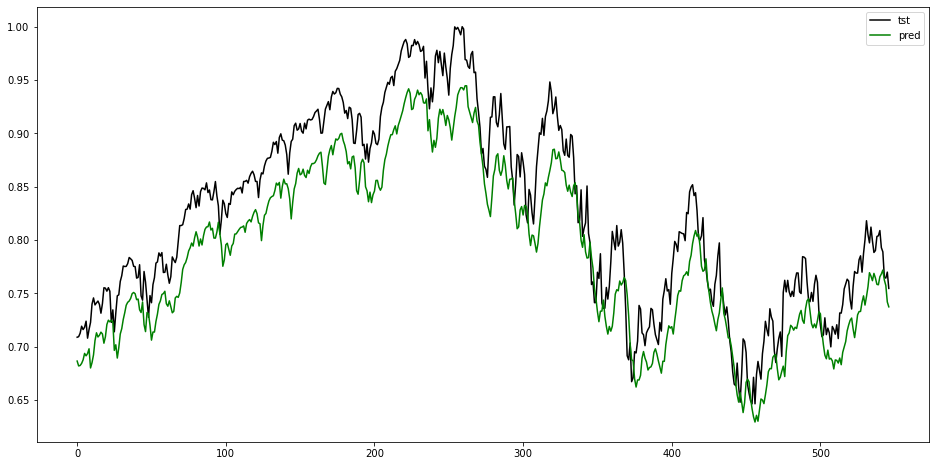

In [40]:
plt.figure(figsize=(16, 8))
plt.plot(y_test, color="black", label="tst")
plt.plot(y_pred, color="green", label="pred")
plt.legend()
plt.show()